In [26]:
import seaborn as sns
import pandas as pd
import numpy as np
from math import sqrt

import json
import pandas as pd
import random


In [27]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

def gen(I1, I2,w,r):
    """ Generalize distance measure between two irises """
    first_row = tuple(I1)
    second_row = tuple(I2)
    my_result = w * sum([abs(a - b) ** r for a, b in zip(first_row, second_row)])
    return my_result

def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    
    # return string   
    return str1  

In [28]:
dataset=pd.read_csv('iris.dat', skiprows = 1,header = None)
#out = pd.Categorical(dataset.iloc[:, 4])
output=dataset.iloc[:, 4].astype('category').cat.codes
dataset=dataset.drop(dataset.columns[4], axis = 1) 

In [29]:
data=dataset.to_numpy()
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
gen(data[1], data[0],1,2)


0.2899999999999997

In [30]:
def procure_neighbors(train, test_row, k,w,r):
    distances = list()
    for i in range(len(train)):
        dist = gen(test_row, train[i],w,r)
        distances.append((i,train[i], dist))
    distances.sort(key=lambda tup: tup[2])
    neighbors = list()
    for i in range(k):
        neighbors.append(distances[i])
    return neighbors[1:2]

In [31]:
first_num = []
ar1 = []
ar2 = []
ar3 = []
ar4 = []
fin_num = []
for i in range(100):
    one = random.randint(1, 100)
    #print(one)
    two = random.randint(1, 100)
    three = random.randint(1, 100)
    rand_arr = random.randint(1, 100)
    result = procure_neighbors(data, data[rand_arr], one,two,three)
    alpha = str(result)
    alpha = alpha.split(',')
    num_one = alpha[0]
    #print(num_one)
    num_one = float(num_one[2:])
    one_array = list(alpha[1]) 
    #print(one_array)
    one_array = one_array[8:]
    array_one = float(listToString(one_array))
    #print(array_one)
    array_two = float(alpha[2])
    array_three = float(alpha[3])
    array_four = list(alpha[4]) 
    array_four = array_four[:-2]
    array_four = float(listToString(array_four))
    last_num = alpha[5]
    last_num = float(last_num[:-2])
    first_num.append(num_one)
    ar1.append(array_one)
    ar2.append(array_two)
    ar3.append(array_three)
    ar4.append(array_four)
    fin_num.append(last_num)

d = {'Last Iteration': first_num, 'Weight # 1': ar1, 'Weight # 2': ar2, 'Weight # 3': ar3, 
     'Weight # 4': ar4, 'accuracy': fin_num}
df = pd.DataFrame(data=d)
    

ValueError: could not convert string to float: ''

In [32]:
df

,Last Iteration,Weight # 1,Weight # 2,Weight # 3,Weight # 4,accuracy
0,92.0,5.8,2.6,4.0,1.2,3.264225e-06
1,31.0,5.4,3.4,1.5,0.4,5.070602e-66
2,33.0,5.5,4.2,1.4,0.2,2.670643e-31
3,50.0,7.0,3.2,4.7,1.4,4.487533e-60
4,31.0,5.4,3.4,1.5,0.4,1.236951e-22
...,...,...,...,...,...,...
95,8.0,4.4,2.9,1.4,0.2,1.120000e-60
96,27.0,5.2,3.5,1.5,0.2,1.700000e-07
97,29.0,4.7,3.2,1.6,0.2,5.800000e-68
98,56.0,6.3,3.3,4.7,1.6,4.412579e-54


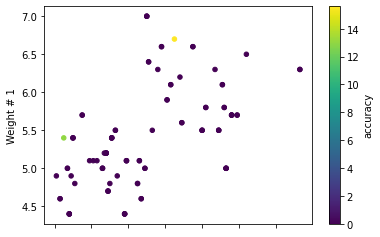

In [24]:
df.plot.scatter(x='Last Iteration',y='Weight # 1',c='accuracy',colormap='viridis')

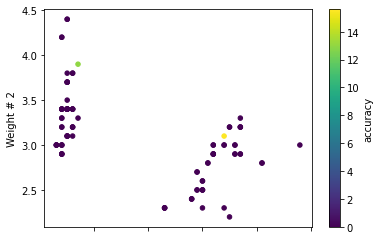

In [25]:
df.plot.scatter(x='Weight # 3',y='Weight # 2',c='accuracy',colormap='viridis')

Part A.) In Part A I increased my K number in the KNN supervised learning model from one to five. We used KNN for classification purposes with the end goal of succesfully classifying each iris plant. At first I took the euclidean distance between row 1 and row 2.Then I generalized the distances between the two irises. I set 5 as my K number and the distance of a new data point was calculated from all the other training points using the algirithom. It ultimately assigned the datapoints to 5 separate groups.

Part B.) Instead of using euclidean distance in this part we used the general Minkowski distance. It was calucalated in normed vector space. The distance ended up being about 0.29

Part C.)The code in part C is meant to bring parst A and B and take full advantage of them. Within the for loop seen above, All of the varialbes are randomized into the created functions over 100 times, and each variable is put into it's own list. These variables art then formatted and put into a Pandas DataFrame. This DataFrame can then be manipulated into a large amount of different representations.